# Project 2: Investigate a Dataset - IMDB Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#acknowledgements">Acknowledgements</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This data set contains information about 10,000 movies collected from The Movie Database (IMDb),including user ratings and revenue. The purpose of this project is to understand what are the variables that influence the revenue and in order to achieve that some key questions are asked and answered using either statistics or visualizations with seaborn and matplotlib:

> What are the top 5 movies by revenue?<br>
> Who are the top 5 directors by revenue?<br>
> What are the top 5 genres by revenue?<br>
> Who are the top 5 companies by revenue?<br>
> Arew there any correlations with revenue and other variables?<br>
> How does this correlation look? is it possible to do linear regression?<br>

In [2]:
import csv
import pandas as pd
import numpy as np
from statsmodels.graphics.gofplots import qqplot
import seaborn as sns
from matplotlib import pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 5]


# FUnction for showing the correlation heatmap
def correlation_visual(df):
    correlation = df.corr()
    figure = plt.figure('Correlation')
    sns.heatmap(correlation, vmin=-1, vmax=1, cmap='coolwarm', annot=True, linewidths=0.5)
    return correlation

<a id='wrangling'></a>
## Data Wrangling

### Serializing the data
> Loading the data into the notebook for exploration

In [3]:
path =r'tmdb-movies.csv'
df = pd.read_csv(path)

### Initial Data Exploration

> How many variables, what is their type, and how many observationsa are non null?

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

> Understanding the contents of the dataset

In [5]:
df.head(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


### Cleaning the data
> Remove duplicate rows (fully duplicated accross alll variables)

In [6]:
df.drop_duplicates(inplace=True)

>Remove rows with duplicated imdb_id

In [7]:
df.drop_duplicates(subset='imdb_id', inplace=True)

>Remove columns that have high number of missing values or are not of interest for the target variable (revenue)

In [8]:
df.drop(columns=['homepage',
                 'tagline',
                 'keywords',
                 'overview'], inplace=True)

>Remove rows with missing values

In [9]:
df.dropna(inplace=True)

>Remove rows where revenue or budget is unknown, i.e., 0 (revenue is target variable)

In [10]:
df.drop(df[df['revenue'] == 0.0].index, inplace=True)
df.drop(df[df['budget'] == 0.0].index, inplace=True)

>Data Structure after cleaning


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3805 entries, 0 to 10848
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    3805 non-null   int64  
 1   imdb_id               3805 non-null   object 
 2   popularity            3805 non-null   float64
 3   budget                3805 non-null   int64  
 4   revenue               3805 non-null   int64  
 5   original_title        3805 non-null   object 
 6   cast                  3805 non-null   object 
 7   director              3805 non-null   object 
 8   runtime               3805 non-null   int64  
 9   genres                3805 non-null   object 
 10  production_companies  3805 non-null   object 
 11  release_date          3805 non-null   object 
 12  vote_count            3805 non-null   int64  
 13  vote_average          3805 non-null   float64
 14  release_year          3805 non-null   int64  
 15  budget_adj          

<a id='eda'></a>
## Exploratory Data Analysis

> In this section the target variable revenue will be explored statistically and visually and the objetive is to find what drives revenue in the movie bussiness.

### What are the top 10 movies by revenue?

In [12]:
df[['original_title','director','production_companies','budget_adj','revenue_adj']].sort_values(by='revenue_adj', ascending=False).head(5)

,original_title,director,production_companies,budget_adj,revenue_adj
1386,Avatar,James Cameron,Ingenious Film Partners|Twentieth Century Fox ...,2.408869e+08,2.827124e+09
1329,Star Wars,George Lucas,Lucasfilm|Twentieth Century Fox Film Corporation,3.957559e+07,2.789712e+09
5231,Titanic,James Cameron,Paramount Pictures|Twentieth Century Fox Film ...,2.716921e+08,2.506406e+09
10594,The Exorcist,William Friedkin,Warner Bros.|Hoya Productions,3.928928e+07,2.167325e+09
9806,Jaws,Steven Spielberg,Universal Pictures|Zanuck/Brown Productions,2.836275e+07,1.907006e+09


### Who are the top 5 directors that have pulled the most revenue?

In [13]:
df.groupby(['director']).agg({'revenue_adj':['min', 'max','mean','sum']}).reset_index().sort_values(by=('revenue_adj','sum'), ascending=False).head(5)

director   revenue_adj                                          
                                 min           max          mean           sum
1521  Steven Spielberg  5.660523e+07  1.907006e+09  5.630536e+08  1.520245e+10
632      James Cameron  2.019944e+07  2.827124e+09  9.159026e+08  7.327221e+09
1221     Peter Jackson  3.770420e+05  1.326278e+09  6.381680e+08  7.019848e+09
532       George Lucas  1.312372e+07  2.789712e+09  1.052320e+09  6.313919e+09
1354   Robert Zemeckis  3.099917e+07  9.973333e+08  3.770432e+08  5.655648e+09

### Who are the top 5 genres that have pulled the most revenue?

In [14]:
df.groupby(['genres']).agg({'revenue_adj':['min', 'max','mean','sum']}).reset_index().sort_values(by=('revenue_adj','sum'), ascending=False).head(5)

genres    revenue_adj                              \
                                          min           max          mean   
386                     Comedy      40.755689  4.763508e+08  9.408937e+07   
541                      Drama      17.017687  7.064045e+08  8.089592e+07   
470             Comedy|Romance      13.853345  6.176395e+08  1.284289e+08   
236  Adventure|Action|Thriller  519540.840096  9.771535e+08  4.927097e+08   
427       Comedy|Drama|Romance   13881.763226  9.973333e+08  1.074570e+08   

                   
              sum  
386  2.164056e+10  
541  1.965771e+10  
470  1.322818e+10  
236  1.083961e+10  
427  9.348760e+09

### Who are the top 5 companies that have pulled the most revenue?

In [15]:
df.groupby(['production_companies']).agg({'revenue_adj':['min', 'max','mean','sum']}).reset_index().sort_values(by=('revenue_adj','sum'), ascending=False).head(5)

production_companies   revenue_adj  \
                                                             min   
1629                            Paramount Pictures  8.970219e+06   
2860  Walt Disney Pictures|Pixar Animation Studios  4.861166e+08   
638                           DreamWorks Animation  3.116093e+07   
2513                            Universal Pictures  5.008177e+06   
340                              Columbia Pictures  3.171639e+06   

                                                
               max          mean           sum  
1629  9.973333e+08  1.611591e+08  1.240925e+10  
2860  1.063172e+09  6.386005e+08  8.301807e+09  
638   8.402392e+08  4.422002e+08  6.633003e+09  
2513  7.839013e+08  1.082690e+08  6.171332e+09  
340   1.583050e+09  1.564911e+08  6.103155e+09

### Are there any variables that are driving the revenue?
> Are there any correlations between variables, specially between revenue_adj and the other variables?

#### Basic statistical information on revenue_adj
> revenue_adj is chosen as the independent variable and the target\
 will be to find what are the dependent variables that influence it.')


In [16]:
target = 'revenue_adj'

print(f"Basic Statistical Information for {target}\n\
            \nMax: {np.amax(df[target])}\
            \nMin: {np.amin(df[target])}\
            \nRange: {np.ptp(df[target])}\
            \nMean: {np.mean(df[target])}\
            \nMedian: {np.median(df[target])}\
            \nVariance: {np.var(df[target])}\
            \nStandard Deviation: {np.std(df[target])}\
            \nSkew: {df[target].skew()}\
            \nPercentiles 25, 50, 75 and 95: {np.percentile(df[target], [25, 50, 75, 95])}\
            \nInterquantile Range: {np.percentile(df[target], 75) - np.percentile(df[target], 25)}")

Basic Statistical Information for revenue_adj
            
Max: 2827123750.41189            
Min: 2.37070528956505            
Range: 2827123748.041185            
Mean: 138715934.3461038            
Median: 62846878.2935626            
Variance: 4.707545788470595e+16            
Standard Deviation: 216968794.72566083            
Skew: 4.028478241169116            
Percentiles 25, 50, 75 and 95: [1.92537110e+07 6.28468783e+07 1.65805400e+08 5.52259698e+08]            
Interquantile Range: 146551689.3227871


> Distribution of target variable


Text(0.5, 1.0, 'Distribution of revenue_adj')

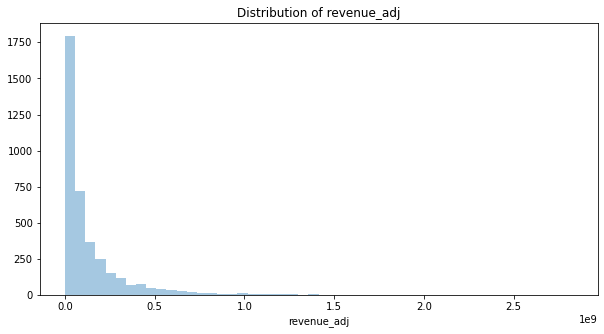

In [17]:
sns.distplot(df[target], bins=50, kde=False)
plt.title(f'Distribution of {target}')

> Since the data has a poisson form, linear regression cannot be used as is, this can be further proved by a normality test with a QQplot

Text(0.5, 1.0, 'QQplot')

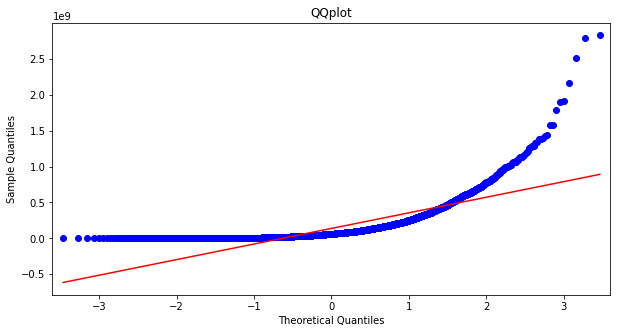

In [18]:
qqplot(df[target], line='s')
plt.title('QQplot')

>  Because of this result, regression analysis will be skipped for this project and correlations will be made based on the correlation coeficient R, and visualizations.

### What are the variables that are driving the revenue?
> Are there any correlations between variables, specially between revenue_adj and the other variables?

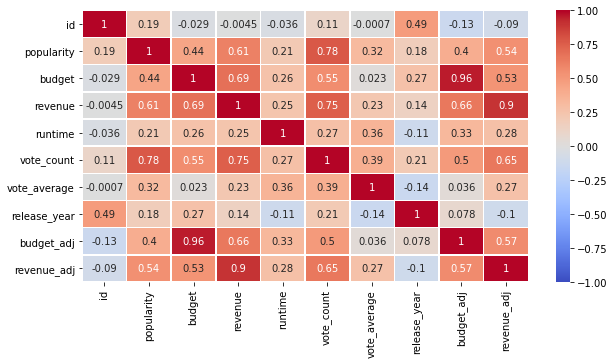

In [19]:
correlation = correlation_visual(df)

> It is interesting to see that budget, vote_count and popularity has a bigger correlation coeficient compared to vote average and runtime.

> How is the correlation between revenue_adj and Budget?

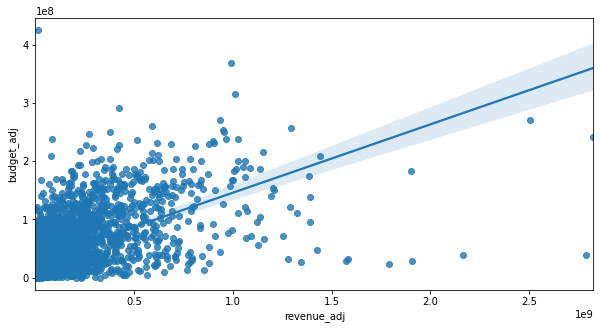

In [20]:
sns.regplot(x='revenue_adj',y='budget_adj',data=df, fit_reg=True)

> How is the correlation between revenue_adj and Budget?

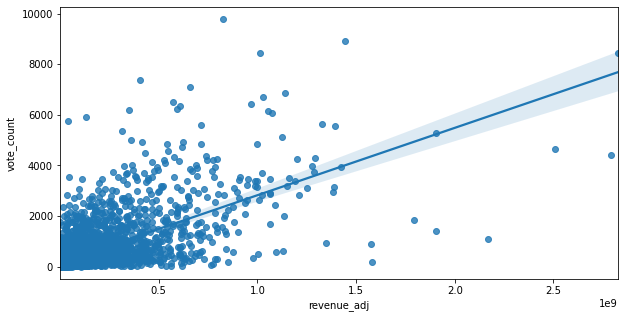

In [21]:
sns.regplot(x='revenue_adj',y='vote_count',data=df, fit_reg=True)

> How is the correlation between revenue_adj and Budget?

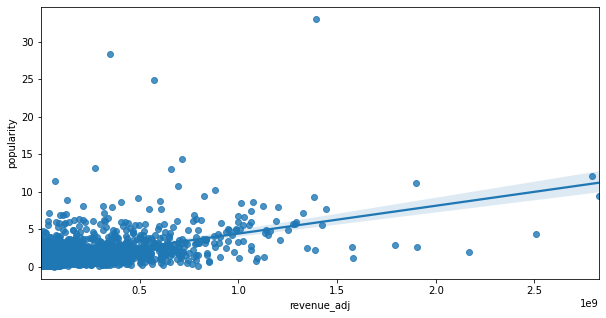

In [22]:
sns.regplot(x='revenue_adj',y='popularity',data=df, fit_reg=True)

<a id='conclusions'></a>
## Conclusions

> **Summary of findings**: After analyzing the data some relationship were found between the revenue_Adj popularity, budget_adj and vote_count , nevertheless even if there is about a 50% correlation with those variables this does not imply causation, and further statistical studies like a poisson regression might be necessary, the challenge with this apporoach is the dispersion of the data and the skew. I am also concerned about the quality of the information, some values in budget and revenue make no sense, because are very small compared to other similar entries, but it is non-trivial to define a cutoff limit to filter for these potential typos.

> Having said that with the data available and the studies made, it is possible that: 
**the revenue of a given movie is mainly influended by the budget of the movies combined with the popularity with the consumers**.

> A deeper statistical analysis is required to give a conclusion with some level of confidence.


<a id='acknowledgements'></a>
## Acknowledgements

> **Resources used during the investigation**: In this project some code snipets were taken from https://stackoverflow.com, www.medium.com, www.towardsdatascience.com, and www.realpython.com. where I got some ideas on how to implement a few parts related to the cleaning and plotting, I also used the official documentation for Seaborn, Pandas and Matplotlib to debug some issues in the code.